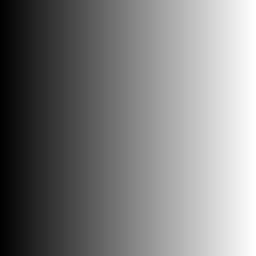

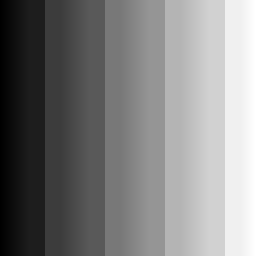

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
from add_watermark import modify_red_to_green

pic = np.array([list(range(256)) for _ in range(256)], dtype=np.uint8)
pic_mark = np.array(modify_red_to_green(pic,k=30),dtype=np.uint8)
img = Image.fromarray(pic, mode='L')
img_mark = Image.fromarray(pic_mark, mode='L')
display(img)
display(img_mark)

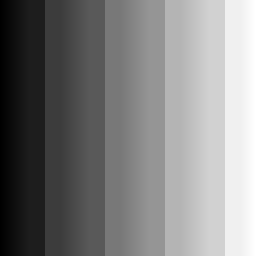

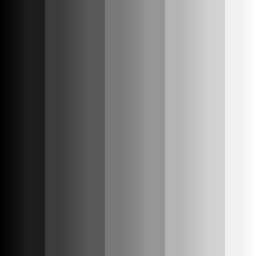

[  0   1   2   3   5   6   7   8   8   9  10  11  13  14  15  16  16  17
  18  19  21  22  23  24  24  25  26  27  29  30  31  32  32  33  34  35
  37  38  39  40  40  41  42  43  45  46  47  48  48  49  50  51  53  54
  55  56  56  57  58  59  61  62  63  64  64  65  66  67  69  70  71  72
  72  73  74  75  77  78  79  80  80  81  82  83  85  86  87  88  88  89
  90  91  93  94  95  96  96  97  98  99 101 102 103 104 104 105 106 107
 109 110 111 112 112 113 114 115 117 118 119 120 120 121 122 123 125 126
 127 128 128 129 130 131 133 134 135 136 136 137 138 139 141 142 143 144
 144 145 146 147 149 150 151 152 152 153 154 155 157 158 159 160 160 161
 162 163 165 166 167 168 168 169 170 171 173 174 175 176 176 177 178 179
 181 182 183 184 184 185 186 187 189 190 191 192 192 193 194 195 197 198
 199 200 200 201 202 203 205 206 207 208 208 209 210 211 213 214 215 216
 216 217 218 219 221 222 223 224 224 225 226 227 229 230 231 232 232 233
 234 235 237 238 239 240 240 241 242 243 245 246 24

In [3]:
img.save(f"img_compressed_quality.jpg", "JPEG", quality=50)
img_mark.save(f'img_mark.jpg', "JPEG", quality=50)
img_com = Image.open("img_compressed_quality.jpg")
img_mark_com = Image.open("img_mark.jpg")
# display(img_com)
display(img_mark)
display(img_mark_com)
img_com_np = np.array(img_com)
img_mark_com_np = np.array(img_mark_com)
print(img_com_np[0])
print("=" * 30)
print(pic_mark[0])
print("=" * 30)
print(img_mark_com_np[0])

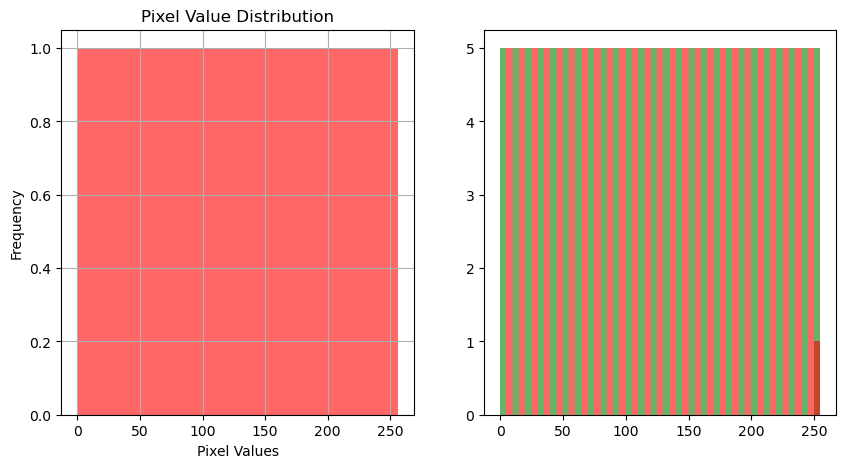

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from utils import distribution_visualize

# 生成两组随机数据
data1 = np.random.randint(0, 256, size=(1000,))
data2 = np.arange(0, 256)
distribution_visualize(data2, 5)

In [5]:
from add_watermark import modify_red_to_green
import numpy as np

x = np.arange(-20, 20)
y = modify_red_to_green(x, k=5)
for i in range(len(x)):
    print(f"{x[i]} -> {y[i]}")

-20 -> -20
-19 -> -19
-18 -> -18
-17 -> -17
-16 -> -16
-15 -> -16
-14 -> -16
-13 -> -10
-12 -> -10
-11 -> -10
-10 -> -10
-9 -> -9
-8 -> -8
-7 -> -7
-6 -> -6
-5 -> -6
-4 -> -6
-3 -> 0
-2 -> 0
-1 -> 0
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 4
6 -> 4
7 -> 10
8 -> 10
9 -> 10
10 -> 10
11 -> 11
12 -> 12
13 -> 13
14 -> 14
15 -> 14
16 -> 14
17 -> 20
18 -> 20
19 -> 20


In [6]:
print(3.2//2)

1.0


In [7]:
from add_watermark import add_wm_FFT, modify_red_to_green
import torch

a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]],dtype=torch.float32)
b = torch.tensor([[2, 3, 4], [5, 6, 7], [8, 9, 10]],dtype=torch.float32)

c = torch.view_as_complex(torch.stack([a, b], dim=-1))
d = a + 1j * b
# print(c)
# print(d)
d = add_wm_FFT(a)
print(d)
# a = modify_red_to_green(a)
# d = a + 1j * b
# print(d)



AttributeError: 'Tensor' object has no attribute 'convert'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个简单的二维数组（例如 5x5 的矩形）
data = np.array([
    [1, 2, 3, 2, 1],
    [2, 4, 6, 4, 2],
    [3, 6, 9, 6, 3],
    [2, 4, 6, 4, 2],
    [1, 2, 3, 2, 1]
])

# 计算二维FFT
fft_data = np.fft.fft2(data)

# 将频域数据中心化
fft_data_shifted = np.fft.fftshift(fft_data)

# 显示原始数据和频域数据
plt.figure(figsize=(10, 5))

# 原始数据
plt.subplot(1, 2, 1)
plt.title("Original Data (Space Domain)")
plt.imshow(data, cmap='gray')
plt.colorbar()

# 频域数据
plt.subplot(1, 2, 2)
plt.title("FFT Data (Frequency Domain)")
plt.imshow(np.log(np.abs(fft_data_shifted) + 1), cmap='gray')  # 对数尺度增强显示
plt.colorbar()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建测试图像（如简单的渐变图像）
data = np.zeros((256, 256))
data[128-20:128+20, 128-20:128+20] = 1  # 中心方块表示低频区域

# 计算二维 FFT
fft_data = np.fft.fft2(data)
fft_data_shifted = np.fft.fftshift(fft_data)

# 计算幅值（能量分布）
magnitude = np.abs(fft_data_shifted)

# 显示结果
plt.figure(figsize=(12, 6))

# 原始图像
plt.subplot(1, 3, 1)
plt.title("Original Image (Space Domain)")
plt.imshow(data, cmap='gray')
plt.colorbar()

# 频谱幅值
plt.subplot(1, 3, 2)
plt.title("Frequency Domain (Log Magnitude)")
plt.imshow(np.log(magnitude + 1), cmap='gray')  # 对数增强显示
plt.colorbar()

# 频谱能量分布
plt.subplot(1, 3, 3)
plt.title("Energy Profile (1D Sum)")
energy_profile = magnitude.sum(axis=0)  # 按列求和能量
plt.plot(energy_profile)
plt.xlabel("Frequency Index")
plt.ylabel("Energy")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from add_watermark import Watermark_k_layer
k =5
a = np.array([[1,2,3],[4,5,6],[7,8,9],[111,124,144]]) 
a = a + 0.1
print(a)
base = np.vectorize(Watermark_k_layer.base)(a,k)
print(base)
b = np.vectorize(Watermark_k_layer.scalling)(a,k)
g = np.vectorize(Watermark_k_layer.is_green)(a,k)
print(g)
print(b)
all_g = np.vectorize(Watermark_k_layer.is_green)(b,k)
print(all_g)


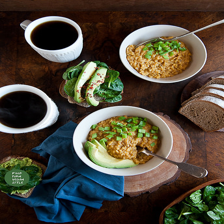

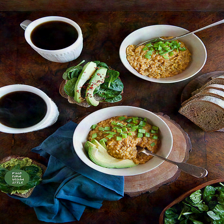

[0.81546955] -> [0.81557584] -> [0.82292995]
[0.96408642] -> [0.82405931] -> [0.83418367]


In [5]:
from data import load_random_images
from add_watermark import modify_red_to_green, add_wm_FFT, Watermark_k_layer
from attack import attack_all, random_crop, compression
import matplotlib.pyplot as plt
from utils import draw, numpy_to_images, images_to_numpy
from examine import caculate
import numpy as np
from tqdm import tqdm
import torch
import torch.fft as fft

images_ori = load_random_images("D:/Doc/code/watermark/code/ILSVRC/Data/DET/test", 1, target_size=(224,224) ,type="RGB")
display(images_ori[0])
k = 5
images_watermark = Watermark_k_layer.modify_k_percents(images_ori, k)
images_crop = random_crop(images_to_numpy(images_watermark), 0.75)
images_ori_crop = random_crop(images_to_numpy(images_ori), 0.75)
images_compress = compression(images_to_numpy(images_watermark), quality=50)
images_ori_compress = compression(images_to_numpy(images_ori), quality=50)
display(images_watermark[0])
o1 = Watermark_k_layer.z_check(images_to_numpy(images_ori), k)
p1 = Watermark_k_layer.z_check(images_to_numpy(images_watermark), k)
p2 = Watermark_k_layer.z_check(images_crop, k)
p3 = Watermark_k_layer.z_check(images_compress, k)

o2 = Watermark_k_layer.z_check(images_ori_crop, k)
o3 = Watermark_k_layer.z_check(images_ori_compress, k)
print(o1, "->" ,o2, "->" ,o3)
print(p1, "->" ,p2, "->" ,p3)

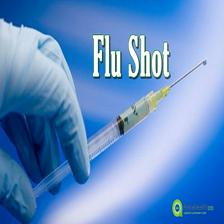

AttributeError: 'list' object has no attribute 'covert_to'

In [7]:
from data import load_random_images
import cv2
from add_watermark import modify_red_to_green, add_wm_FFT, Watermark_k_layer
from attack import attack_all, random_crop, compression
import matplotlib.pyplot as plt
from utils import draw, numpy_to_images, images_to_numpy
from examine import caculate
import numpy as np
from tqdm import tqdm
import torch
import torch.fft as fft

images_ori = load_random_images("D:/Doc/code/watermark/code/ILSVRC/Data/DET/test", 1, target_size=(224,224) ,type="YCbCr")
display(images_ori[0])
k = 5
images_watermark = Watermark_k_layer.dct_change(images_ori, k)
images_watermark = [img.convert("RGB") for img in images_watermark]
images_crop = random_crop(images_to_numpy(images_watermark), 0.75)
images_ori_crop = random_crop(images_to_numpy(images_ori), 0.75)
images_compress = compression(images_to_numpy(images_watermark), quality=50)
images_ori_compress = compression(images_to_numpy(images_ori), quality=50)
display(images_watermark[0])
o1 = Watermark_k_layer.dct_z_check(images_to_numpy(images_ori), k)
p1 = Watermark_k_layer.dct_z_check(images_to_numpy(images_watermark), k)
p2 = Watermark_k_layer.dct_z_check(images_crop, k)
p3 = Watermark_k_layer.dct_z_check(images_compress, k)

o2 = Watermark_k_layer.dct_z_check(images_ori_crop, k)
o3 = Watermark_k_layer.dct_z_check(images_ori_compress, k)
print(o1, "->" ,o2, "->" ,o3)
print(p1, "->" ,p2, "->" ,p3)
